<a href="https://colab.research.google.com/github/Camilojaravila/202310_MINE-4206_ANALISIS_CON_MACHINE_LEARNING/blob/main/Laboratorio%204/Taller%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

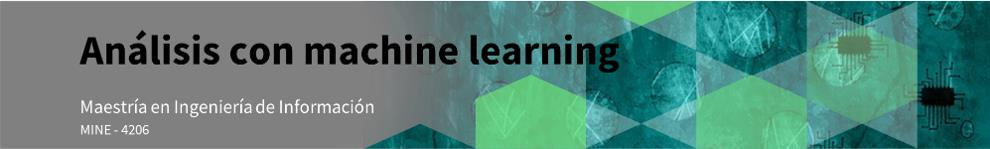

* **Integrante 1:** Fabián Camilo Castellanos Pinto


# Importación de Librerías.

In [1]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install ydata-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.3/352.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 56.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ec0b6090415d457a85bf52037a3bf0c933a2a5f58518e4163846c4b8430ccfae
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    

In [3]:
!pip install --upgrade Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 33.7 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


In [1]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import sys
import os
import os.path as osp

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.metrics import silhouette_score, silhouette_samples, rand_score, f1_score

from ydata_profiling import ProfileReport

In [3]:
seed = 19

# Diccionario de Datos

El conjunto de datos "Tech Students' Profile Prediction" contiene información sobre las habilidades, preferencias profesionales y antecedentes académicos de estudiantes en el campo de la tecnología. En este proyecto, se busca aplicar técnicas de agrupación para identificar grupos de estudiantes con perfiles similares, lo que podría ser útil para la orientación profesional y la personalización de programas educativos.

El objetivo de este proyecto es desarrollar un modelo de agrupación que clasifique a los estudiantes en función de sus habilidades, intereses y antecedentes, utilizando los datos proporcionados en el conjunto de datos "Tech Students' Profile Prediction". Este modelo deberá ser capaz de identificar patrones y tendencias en los perfiles de los estudiantes, lo que podría ayudar a las instituciones educativas y a los empleadores a adaptar sus estrategias de enseñanza y contratación.

Para poder realizar este proyecto, se le piden los siguientes análisis:

* Realizar la agrupación con el Algoritmo k-Means. Obtener los centroides e interpretarlos.


**Fuente de datos:** [Tech Students' Profile Prediction](https://www.kaggle.com/datasets/scarecrow2020/tech-students-profile-prediction)

Se dan a disposición 19.531 instancias los cuales conforme los datos en el dataser, están compuestos de la siguiente forma:

| ATRIBUTO | DESCRIPCIÓN |
| :- | :- |
| **Unnamed: 0** | Columna no usada |
| **NAME** | Nombre del estudiante |
| **USER_ID** | Identificador del estudiante |
| **HOURS_DATASCIENCE** | Número de horas estudiandas en ciencia de datos |
| **HOURS_BACKEND** | Número de horas estudiandas en Back-End Web |
| **HOURS_FRONTEND** | Número de horas estudiandas en Front-End Web |
| **NUM_COURSES_BEGINNER_DATASCIENCE** | Número de cursos para principiante en ciencia de datos, completados por el estudiante |
| **NUM_COURSES_BEGINNER_BACKEND** | Número de cursos para principiante en Back-End Web, completados por el estudiante |
| **NUM_COURSES_BEGINNER_FRONTEND** | Número de cursos para principiante en Front-End Web, completados por el estudiante |
| **NUM_COURSES_ADVANCED_DATASCIENCE** | Número de cursos avanzados en ciencia de datos, completados por el estudiante |
| **NUM_COURSES_ADVANCED_BACKEND** | Número de cursos avanzados Back-End Web, completados por el estudiante |
| **NUM_COURSES_ADVANCED_FRONTEND** | Número de cursos avanzados Front-End Web, completados por el estudiante |
| **AVG_SCORE_DATASCIENCE** | Puntaje promedio en ciencia de datos completado por el estudiante |
| **AVG_SCORE_BACKEND** | Puntaje promedio en Back-End Web completado por el estudiante |
| **AVG_SCORE_FRONTEND** | Puntaje promedio en Front-End Web completado por el estudiante |

Importante resaltar que no hay una especificación de negocio en cuánto a los atributos para cada uno de los atributos.

# Perfilamiento y entendimiento de los datos

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download scarecrow2020/tech-students-profile-prediction

  0% 0.00/666k [00:00<?, ?B/s]
100% 666k/666k [00:00<00:00, 99.1MB/s]


In [5]:
! unzip tech-students-profile-prediction.zip -d "tech-students-profile-prediction"

Archive:  tech-students-profile-prediction.zip
  inflating: tech-students-profile-prediction/dataset-tortuga.csv  
  inflating: tech-students-profile-prediction/to_be_scored_tortuga.csv  


In [6]:
url = '/content/tech-students-profile-prediction/dataset-tortuga.csv'
data_1 = pd.read_csv(url)

data_1

,Unnamed: 0,NAME,USER_ID,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND,PROFILE
0,28,Stormy Muto,58283940,7.0,39.0,29.0,2.0,4.0,0.0,2.0,5.0,0.0,84.0,74.0,NaN,beginner_front_end
1,81,Carlos Ferro,1357218,32.0,0.0,44.0,2.0,0.0,0.0,0.0,5.0,0.0,67.0,45.0,NaN,beginner_front_end
2,89,Robby Constantini,63212105,45.0,0.0,59.0,0.0,5.0,4.0,0.0,4.0,1.0,NaN,54.0,47.0,advanced_front_end
3,138,Paul Mckenny,23239851,36.0,19.0,28.0,0.0,5.0,7.0,0.0,5.0,3.0,NaN,71.0,89.0,beginner_data_science
4,143,Jean Webb,72234478,61.0,78.0,38.0,6.0,11.0,0.0,4.0,3.0,0.0,66.0,85.0,NaN,advanced_front_end
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,20495,Rose Jurado,66754730,0.0,44.0,42.0,8.0,4.0,7.0,3.0,3.0,3.0,74.0,73.0,93.0,advanced_backend
19996,20496,Johnny Jones,6874888,0.0,85.0,63.0,3.0,5.0,0.0,4.0,7.0,3.0,50.0,83.0,94.0,advanced_front_end
19997,20497,Lawrence Givens,83752787,32.0,50.0,22.0,0.0,4.0,0.0,6.0,2.0,3.0,61.0,81.0,75.0,advanced_backend
19998,20498,Betty Diclaudio,45806698,0.0,96.0,69.0,3.0,3.0,3.0,5.0,7.0,4.0,64.0,68.0,68.0,advanced_front_end


In [7]:
data_1.shape

(20000, 16)

In [8]:
ProfileReport(data_1)

Output hidden; open in https://colab.research.google.com to view.

In [9]:
data_1[["NAME"]].value_counts()

NAME          
William Smith     7
John Johnson      6
James Smith       6
Michael Smith     6
John Taylor       5
                 ..
George Reck       1
George Preston    1
George Paul       1
George Pagan      1
Zoraida Moler     1
Length: 19531, dtype: int64

Al parecer por nombre podrían presentarse datos duplicados, para corroborar si hay inconsistencia ejecuto lo siguiente:

In [10]:
data_1_ = data_1.copy()
data_1_ = data_1_[["USER_ID", "NAME"]]
data_1_["CONTEO"] = data_1_.groupby("USER_ID")["NAME"].transform("count")
data_1_[data_1_["CONTEO"] > 1]

,USER_ID,NAME,CONTEO


Verifico ausencias en los datos en el nombre

In [11]:
data_1_[data_1_["NAME"].isnull()]["NAME"].count()

0

Observaciones principales sobre los datos:

*   Hay ausencias en los valores de los puntajes promedio del perfil.
*   La información de la columna PROFILE pareciera indicar que los datos están balanceados por la distribución presentada en las categorías con un 16% de ponderación por clase.
*   Dependiendo de la categoría hay valores con cero, pero en el contexto es normal, una persona no necesariamente tiene todos los cursos.
*   Cada una de las columnas numéricas tienen un comportamiento de distribución normal o cercano, lo que indica que no es necesario realizar alguna transformación de los datos antes de agrupar.



# Preprocesamiento de los datos

Contruyo un dataframe que permita evaluar qué tanas ausencias y ceros tengan los registros:

In [12]:
categories = []
types = []
zeros = []
missing = []

for col, col_type in data_1.dtypes.items():
  categories.append(col)
  types.append(col_type)
  zeros.append(data_1[data_1[col] == 0].shape[0])
  missing.append(data_1[data_1[col].isna()].shape[0])

data = {'Categoria': categories,
        'Tipo': types,
        'Cero': zeros,
        'Ausencia': missing
}

data_1_report = pd.DataFrame(data)  
data_1_report["Cero %"] = ( data_1_report["Cero"] * 100 ) / data_1.shape[0]
data_1_report["Cero %"] = data_1_report["Cero %"].apply(lambda x: "{:.1f}".format(float(x)))
data_1_report["Ausencia %"] = ( data_1_report["Ausencia"] * 100 ) / data_1.shape[0]
data_1_report["Ausencia %"] = data_1_report["Ausencia %"].apply(lambda x: "{:.1f}".format(float(x)))
data_1_report

,Categoria,Tipo,Cero,Ausencia,Cero %,Ausencia %
0,Unnamed: 0,int64,0,0,0.0,0.0
1,NAME,object,0,0,0.0,0.0
2,USER_ID,int64,0,0,0.0,0.0
3,HOURS_DATASCIENCE,float64,1273,14,6.4,0.1
4,HOURS_BACKEND,float64,575,53,2.9,0.3
5,HOURS_FRONTEND,float64,943,16,4.7,0.1
6,NUM_COURSES_BEGINNER_DATASCIENCE,float64,1035,26,5.2,0.1
7,NUM_COURSES_BEGINNER_BACKEND,float64,1206,18,6.0,0.1
8,NUM_COURSES_BEGINNER_FRONTEND,float64,1328,39,6.6,0.2
9,NUM_COURSES_ADVANCED_DATASCIENCE,float64,1951,2,9.8,0.0


# Modelamiento

In [13]:
#data_1_ = data_1.drop(["Unnamed: 0", "NAME", "USER_ID", "PROFILE"], axis=1)
data_1_ = data_1.drop(["Unnamed: 0", "NAME", "PROFILE"], axis=1)
data_1_

,USER_ID,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND
0,58283940,7.0,39.0,29.0,2.0,4.0,0.0,2.0,5.0,0.0,84.0,74.0,NaN
1,1357218,32.0,0.0,44.0,2.0,0.0,0.0,0.0,5.0,0.0,67.0,45.0,NaN
2,63212105,45.0,0.0,59.0,0.0,5.0,4.0,0.0,4.0,1.0,NaN,54.0,47.0
3,23239851,36.0,19.0,28.0,0.0,5.0,7.0,0.0,5.0,3.0,NaN,71.0,89.0
4,72234478,61.0,78.0,38.0,6.0,11.0,0.0,4.0,3.0,0.0,66.0,85.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,66754730,0.0,44.0,42.0,8.0,4.0,7.0,3.0,3.0,3.0,74.0,73.0,93.0
19996,6874888,0.0,85.0,63.0,3.0,5.0,0.0,4.0,7.0,3.0,50.0,83.0,94.0
19997,83752787,32.0,50.0,22.0,0.0,4.0,0.0,6.0,2.0,3.0,61.0,81.0,75.0
19998,45806698,0.0,96.0,69.0,3.0,3.0,3.0,5.0,7.0,4.0,64.0,68.0,68.0


Teniendo en cuenta las ausencias y los valores mínimos que tienen, decido eliminar las ausencias y no imputar para tener una mejor respuesta sobre los grupos

In [14]:
#data_1_t = data_1_.copy()
for col, col_type in data_1_.dtypes.items():
  print(f"La columna {col} tiene {data_1_[data_1_[col].isnull()].shape[0]} ausencia(s)")
  data_1_ = data_1_.drop(data_1_.loc[data_1_[col].isnull()].index)

data_1_  

La columna USER_ID tiene 0 ausencia(s)
La columna HOURS_DATASCIENCE tiene 14 ausencia(s)
La columna HOURS_BACKEND tiene 53 ausencia(s)
La columna HOURS_FRONTEND tiene 16 ausencia(s)
La columna NUM_COURSES_BEGINNER_DATASCIENCE tiene 26 ausencia(s)
La columna NUM_COURSES_BEGINNER_BACKEND tiene 18 ausencia(s)
La columna NUM_COURSES_BEGINNER_FRONTEND tiene 39 ausencia(s)
La columna NUM_COURSES_ADVANCED_DATASCIENCE tiene 2 ausencia(s)
La columna NUM_COURSES_ADVANCED_BACKEND tiene 8 ausencia(s)
La columna NUM_COURSES_ADVANCED_FRONTEND tiene 37 ausencia(s)
La columna AVG_SCORE_DATASCIENCE tiene 215 ausencia(s)
La columna AVG_SCORE_BACKEND tiene 82 ausencia(s)
La columna AVG_SCORE_FRONTEND tiene 162 ausencia(s)


,USER_ID,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND
11,34028847,39.0,52.0,34.0,2.0,4.0,4.0,1.0,5.0,5.0,69.0,65.0,73.0
12,87147288,28.0,44.0,16.0,3.0,2.0,5.0,0.0,4.0,4.0,41.0,40.0,76.0
13,28065441,74.0,36.0,41.0,2.0,5.0,2.0,3.0,4.0,2.0,52.0,77.0,66.0
14,13095342,69.0,40.0,18.0,4.0,3.0,5.0,4.0,7.0,6.0,40.0,82.0,78.0
15,81228144,46.0,102.0,44.0,7.0,9.0,3.0,5.0,3.0,3.0,69.0,94.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,66754730,0.0,44.0,42.0,8.0,4.0,7.0,3.0,3.0,3.0,74.0,73.0,93.0
19996,6874888,0.0,85.0,63.0,3.0,5.0,0.0,4.0,7.0,3.0,50.0,83.0,94.0
19997,83752787,32.0,50.0,22.0,0.0,4.0,0.0,6.0,2.0,3.0,61.0,81.0,75.0
19998,45806698,0.0,96.0,69.0,3.0,3.0,3.0,5.0,7.0,4.0,64.0,68.0,68.0


In [15]:
data_1_pre = data_1_.copy()
data_1_pre.head()

,USER_ID,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND
11,34028847,39.0,52.0,34.0,2.0,4.0,4.0,1.0,5.0,5.0,69.0,65.0,73.0
12,87147288,28.0,44.0,16.0,3.0,2.0,5.0,0.0,4.0,4.0,41.0,40.0,76.0
13,28065441,74.0,36.0,41.0,2.0,5.0,2.0,3.0,4.0,2.0,52.0,77.0,66.0
14,13095342,69.0,40.0,18.0,4.0,3.0,5.0,4.0,7.0,6.0,40.0,82.0,78.0
15,81228144,46.0,102.0,44.0,7.0,9.0,3.0,5.0,3.0,3.0,69.0,94.0,50.0


In [16]:
data_1_ = data_1_.drop(["USER_ID"], axis=1)
data_1_

,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND
11,39.0,52.0,34.0,2.0,4.0,4.0,1.0,5.0,5.0,69.0,65.0,73.0
12,28.0,44.0,16.0,3.0,2.0,5.0,0.0,4.0,4.0,41.0,40.0,76.0
13,74.0,36.0,41.0,2.0,5.0,2.0,3.0,4.0,2.0,52.0,77.0,66.0
14,69.0,40.0,18.0,4.0,3.0,5.0,4.0,7.0,6.0,40.0,82.0,78.0
15,46.0,102.0,44.0,7.0,9.0,3.0,5.0,3.0,3.0,69.0,94.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,44.0,42.0,8.0,4.0,7.0,3.0,3.0,3.0,74.0,73.0,93.0
19996,0.0,85.0,63.0,3.0,5.0,0.0,4.0,7.0,3.0,50.0,83.0,94.0
19997,32.0,50.0,22.0,0.0,4.0,0.0,6.0,2.0,3.0,61.0,81.0,75.0
19998,0.0,96.0,69.0,3.0,3.0,3.0,5.0,7.0,4.0,64.0,68.0,68.0


Por la sensibilidad de KMeans verifico diferentes escenarios con distintas semillas:

In [17]:
def search_model(k, seed):
    print(f"Entrenando el modelo con k={k} y semilla={seed}.")
    model = KMeans(n_clusters=k,random_state=seed, init='random', n_init=1)
    model.fit(data_1_)

    return model.inertia_

In [18]:
seed_array = [9, 10, 19, 25, 40, 50]
groups = range(2, 12)
distorsions = dict()

for seed in seed_array:
    distorsions[seed] = list()
    for k in groups:
        inertia = search_model(k, seed)
        distorsions[seed].append(inertia)
        print("Score:",inertia)
        print('-'*50)

Entrenando el modelo con k=2 y semilla=9.
Score: 32451382.876300015
--------------------------------------------------
Entrenando el modelo con k=3 y semilla=9.
Score: 28183746.865434945
--------------------------------------------------
Entrenando el modelo con k=4 y semilla=9.
Score: 25075779.070123777
--------------------------------------------------
Entrenando el modelo con k=5 y semilla=9.
Score: 23106254.970928982
--------------------------------------------------
Entrenando el modelo con k=6 y semilla=9.
Score: 21449286.71025636
--------------------------------------------------
Entrenando el modelo con k=7 y semilla=9.
Score: 20523236.46723118
--------------------------------------------------
Entrenando el modelo con k=8 y semilla=9.
Score: 19489774.094754163
--------------------------------------------------
Entrenando el modelo con k=9 y semilla=9.
Score: 18793965.246748157
--------------------------------------------------
Entrenando el modelo con k=10 y semilla=9.
Score: 

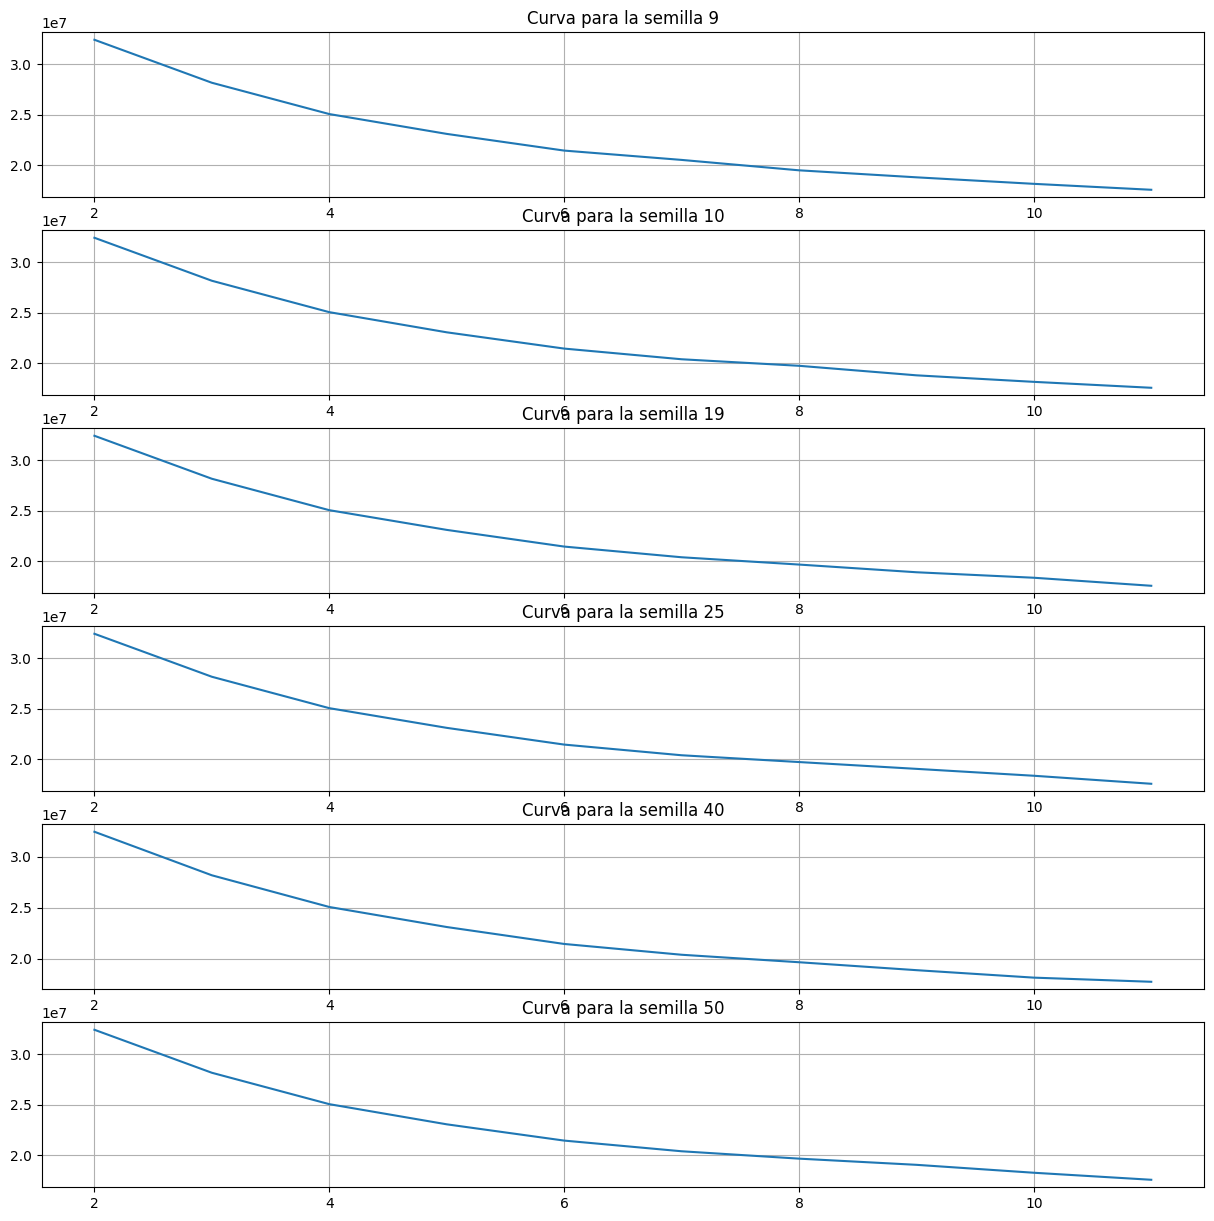

In [19]:
fig = plt.figure(figsize=(15, 15))

for i, sem in enumerate(seed_array):
    ax = plt.subplot(len(seed_array), 1, i + 1)
    plt.plot(groups, distorsions[sem])
    plt.grid(True)
    plt.title(f'Curva para la semilla {sem}')
plt.show()

No parece afectar el comportamiento por el valor de la semilla, esto puede deberse al balance de los datos.

Continuo con la representación gráfica de los diferentes modelos:

In [20]:
def plot_model(k, seed):
    model = KMeans(n_clusters=k,random_state=seed, init='random', n_init=1)
    model.fit(data_1_)
    label = model.labels_

    pca = IncrementalPCA(n_components=2, whiten=True)
    x_plot = pca.fit_transform(data_1_)
    
    colors = ['gold','red','blue','green','orange']
    colors = dict(zip(range(k), colors))

    plt.scatter(x=x_plot[:,0], y=x_plot[:,1], c=[colors.get(x) for x in label])
    plt.title(f'Grupos para la semilla {seed} con k={k}')


Evalúo las semillas con diferentes valores de k(3, 4, 5), pero previamente podría decantarme por k=3 por el perfil, independiente del nivel, en los datos podrían visualizarse los grupos de Data Science, Front-End y Back-End.

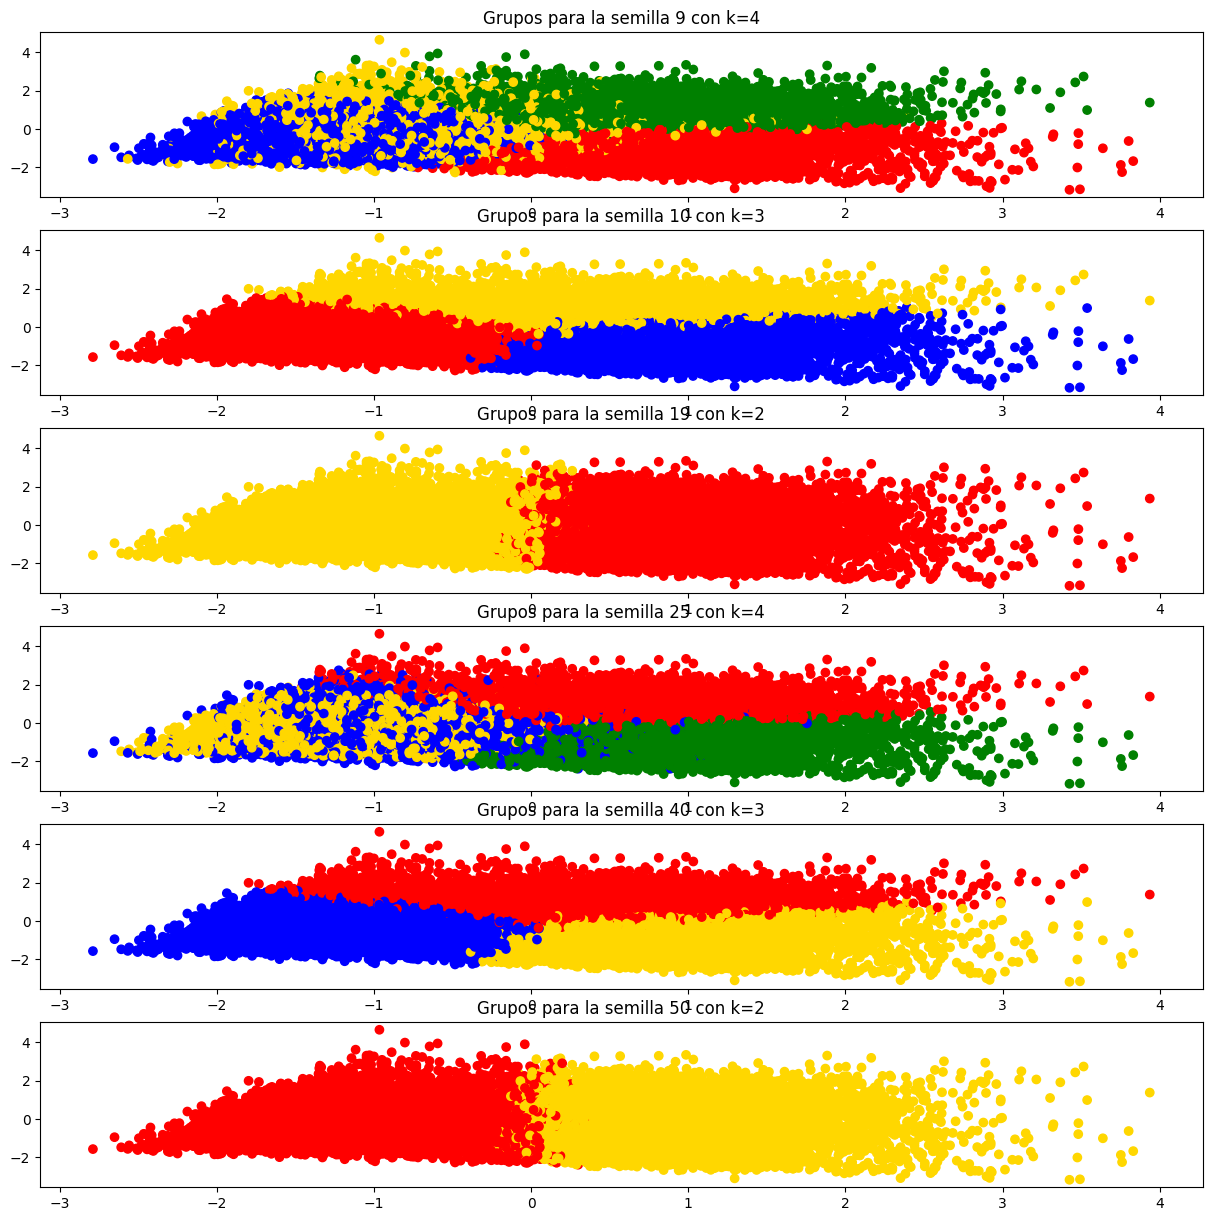

In [21]:
values = [(9, 4),
           (10, 3),
           (19, 2),
           (25, 4),
           (40, 3),
           (50, 2)
           ]

fig = plt.figure(figsize=(15, 15))

for i, valor in enumerate(values):
    seed, k = valor
    ax = plt.subplot(len(values), 1, i + 1)
    plot_model(k, seed)
    
plt.show()

Después de la representación gráfica, verifico las agrupaciones usando el coeficiente silueta:

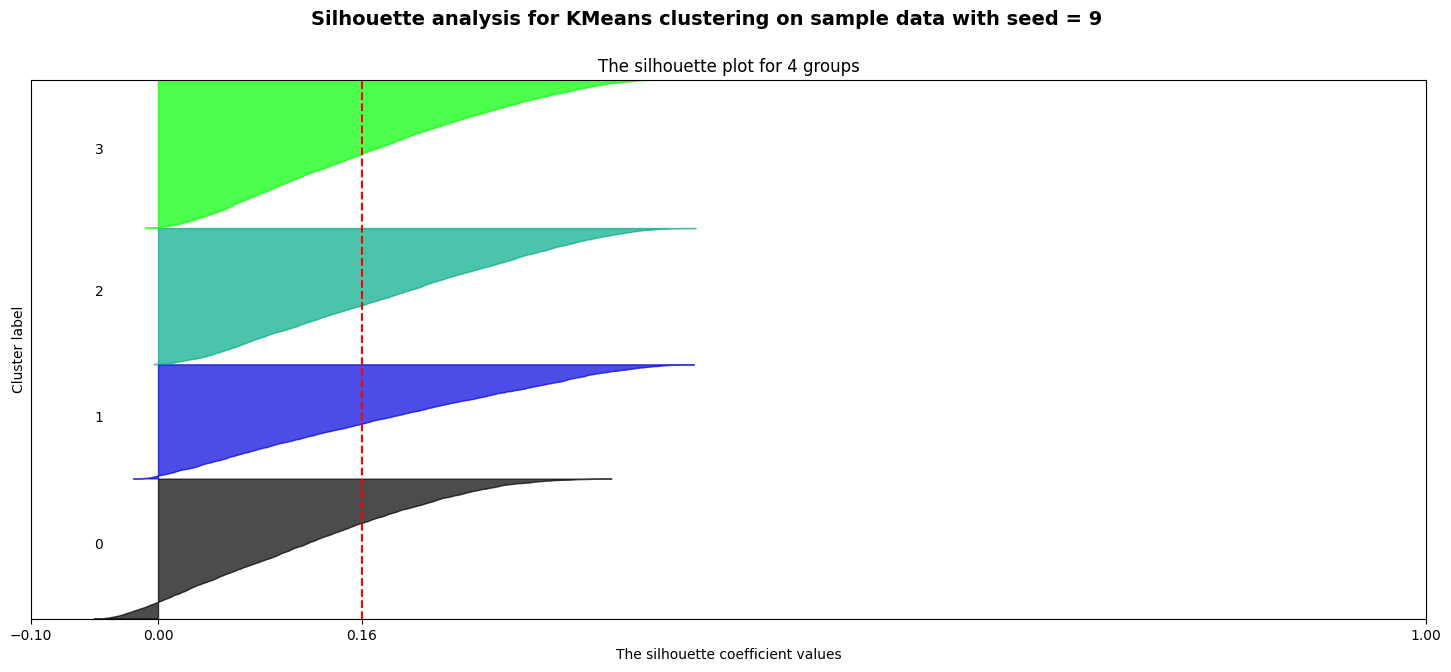

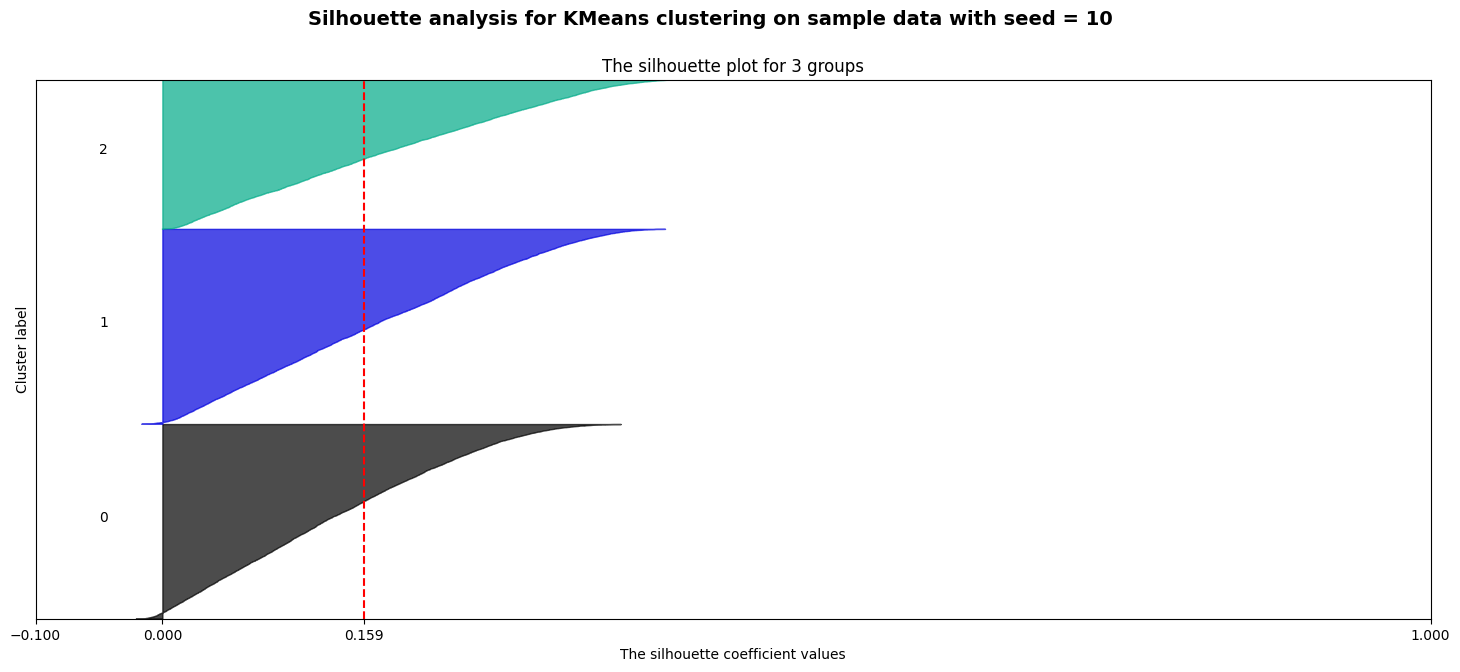

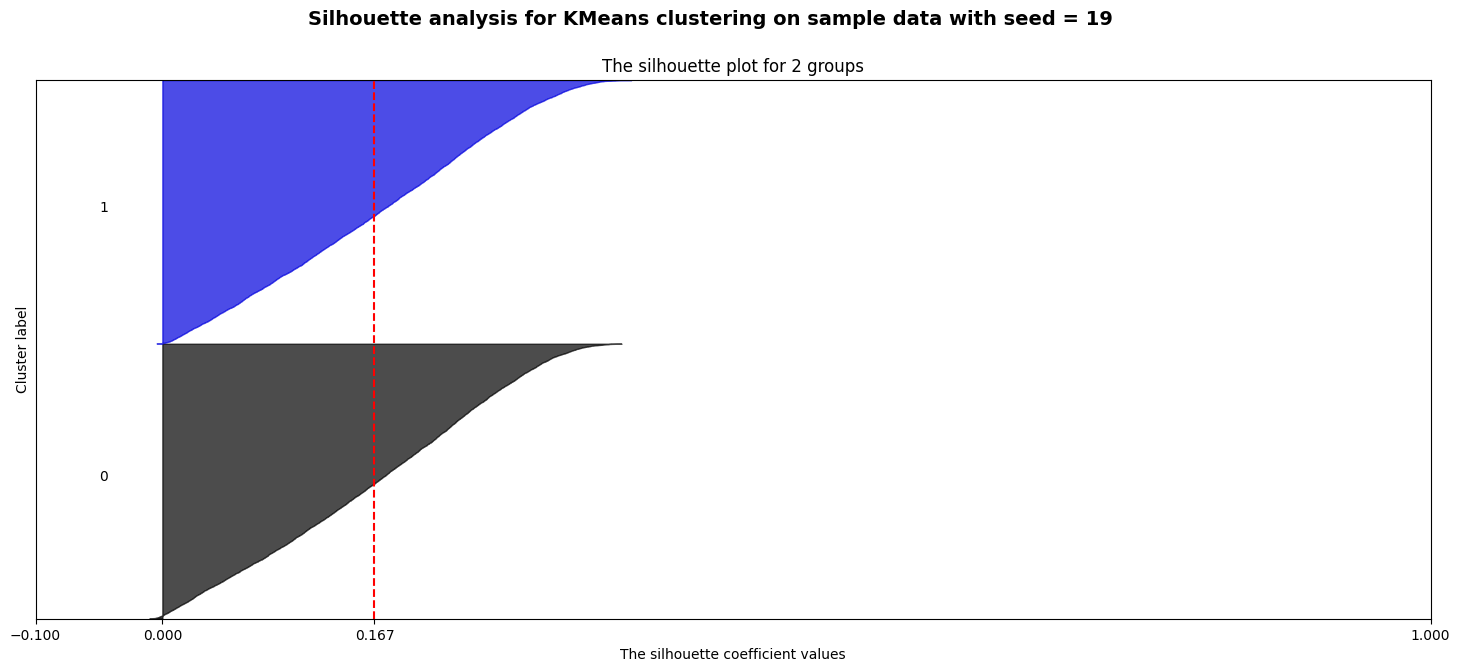

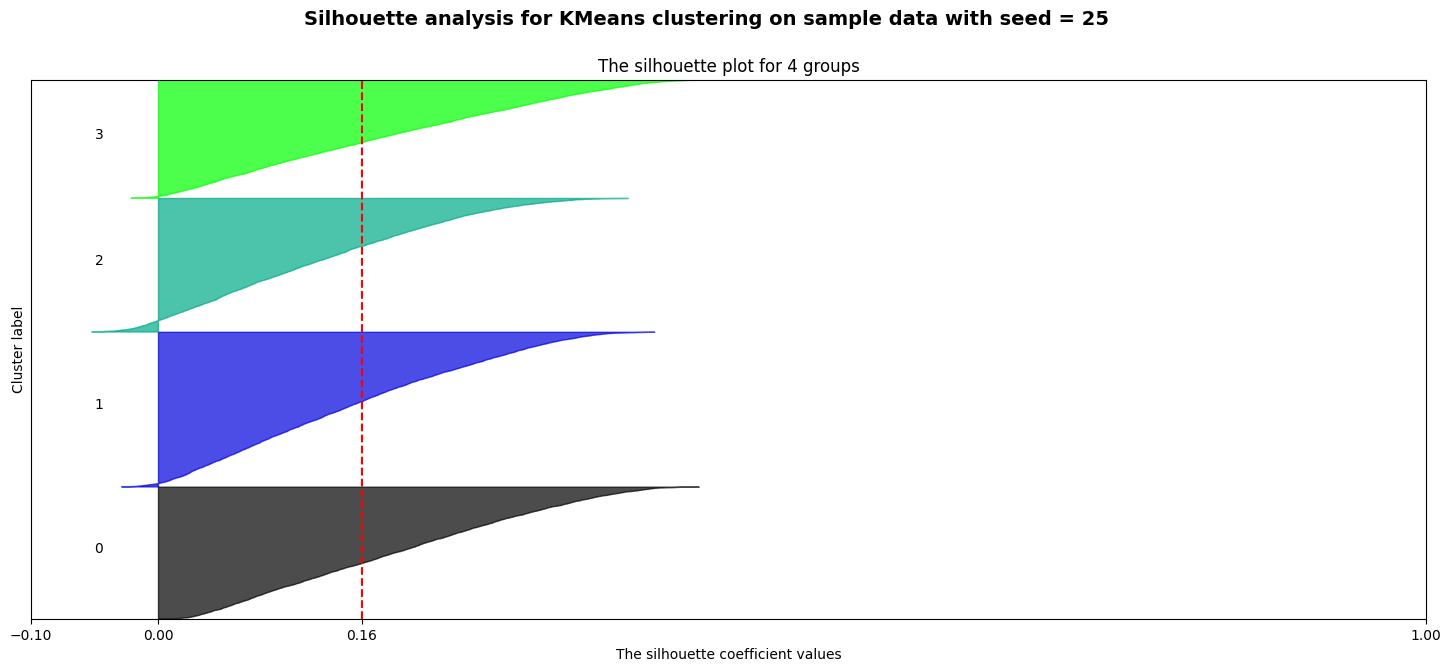

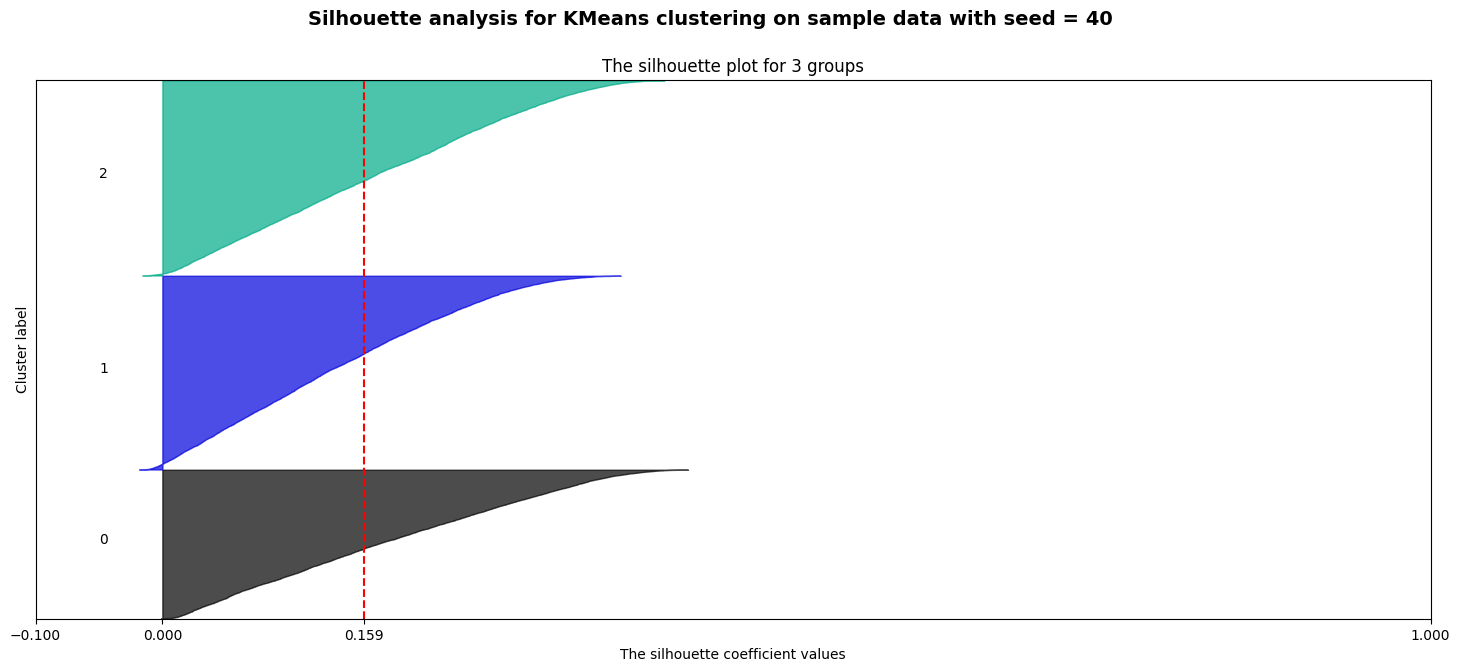

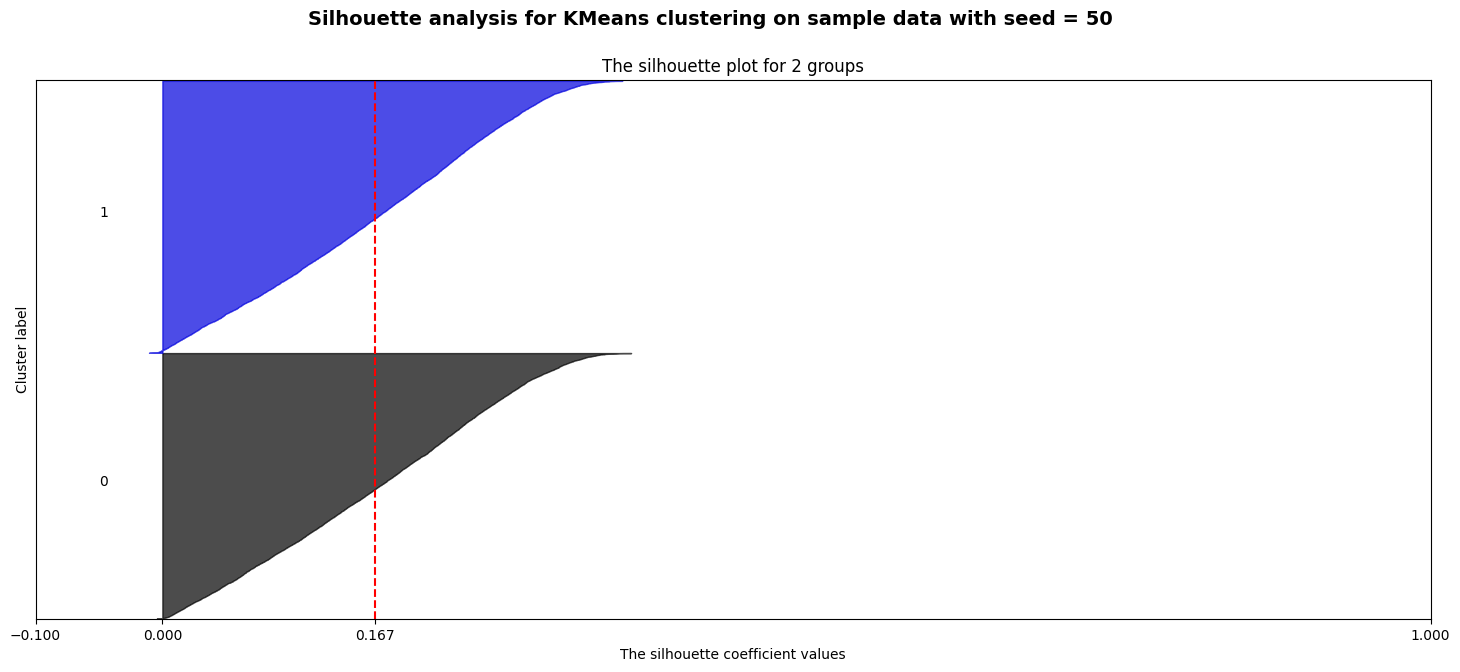

In [22]:
for n, valor in enumerate(values):
    seed, k = valor
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 0.2])
    ax1.set_ylim([0, len(data_1_) + (n + 1) * 10])

    clusterer = KMeans(n_clusters=k, random_state=seed, init='random', n_init=1)
    cluster_labels = clusterer.fit_predict(data_1_)

    silhouette_avg = silhouette_score(data_1_, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_1_, cluster_labels)

    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / 5)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title(f"The silhouette plot for {k} groups")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, silhouette_avg, 1.0])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with seed = %d"
        % seed,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Los valores de los coeficientes siluetas son bajos y ya pude mostrar que la semilla no está incidiendo en la determinación de los grupos, voy a construir un gráfico que permita ver los valores de los coeficientes silueta en diferentes escenarios de k:

In [23]:
seed = 19

In [24]:
k_values = range(2, 11)
silhouette_avgs = []

for k in k_values:
  clusterer = KMeans(n_clusters=k, random_state=seed, init='random', n_init=1)
  cluster_labels = clusterer.fit_predict(data_1_)

  silhouette_avg = silhouette_score(data_1_, cluster_labels)
  # print(silhouette_avg)
  silhouette_avgs.append(silhouette_avg)

data = {
    "k": k_values,
    "Coeficiente": silhouette_avgs
}

k_means_report = pd.DataFrame(data)
k_means_report = k_means_report.set_index('k')
k_means_report

,Coeficiente
k,
2,0.167247
3,0.158844
4,0.160927
5,0.151034
6,0.156113
7,0.146513
8,0.139097
9,0.133380
10,0.133150


In [25]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=k_means_report.index, y=k_means_report["Coeficiente"],
                    mode='lines+markers',
                    name='Seed'))

fig.update_layout(title=f"Silhouette analysis for KMeans clustering on sample data with seed = {seed}",
                   xaxis_title='k')
fig.show()

Si bien tenía indicios de generar 3 grupos, el coeficiente silueta más cercano a 1 según la gráfica anterior corresponde a un k=2.

In [26]:
k = 2

final_model = KMeans(n_clusters=k, random_state=seed, init='random', n_init=1)
final_model.fit(data_1_)

KMeans(init='random', n_clusters=2, n_init=1, random_state=19)

Los centroides de cada uno de los grupos

In [27]:
clusters = final_model.cluster_centers_

info_clusters = pd.DataFrame(clusters, index=[f"Grupo {i + 1}" for i in range(k)], columns=data_1_.columns).transpose()
info_clusters

,Grupo 1,Grupo 2
HOURS_DATASCIENCE,20.894758,55.225704
HOURS_BACKEND,40.133475,47.168219
HOURS_FRONTEND,42.544829,31.191298
NUM_COURSES_BEGINNER_DATASCIENCE,3.411759,4.060978
NUM_COURSES_BEGINNER_BACKEND,3.551002,3.911497
NUM_COURSES_BEGINNER_FRONTEND,4.072455,4.074000
NUM_COURSES_ADVANCED_DATASCIENCE,3.385549,3.459454
NUM_COURSES_ADVANCED_BACKEND,4.119814,4.581939
NUM_COURSES_ADVANCED_FRONTEND,3.568205,3.217447
AVG_SCORE_DATASCIENCE,68.315017,61.562037


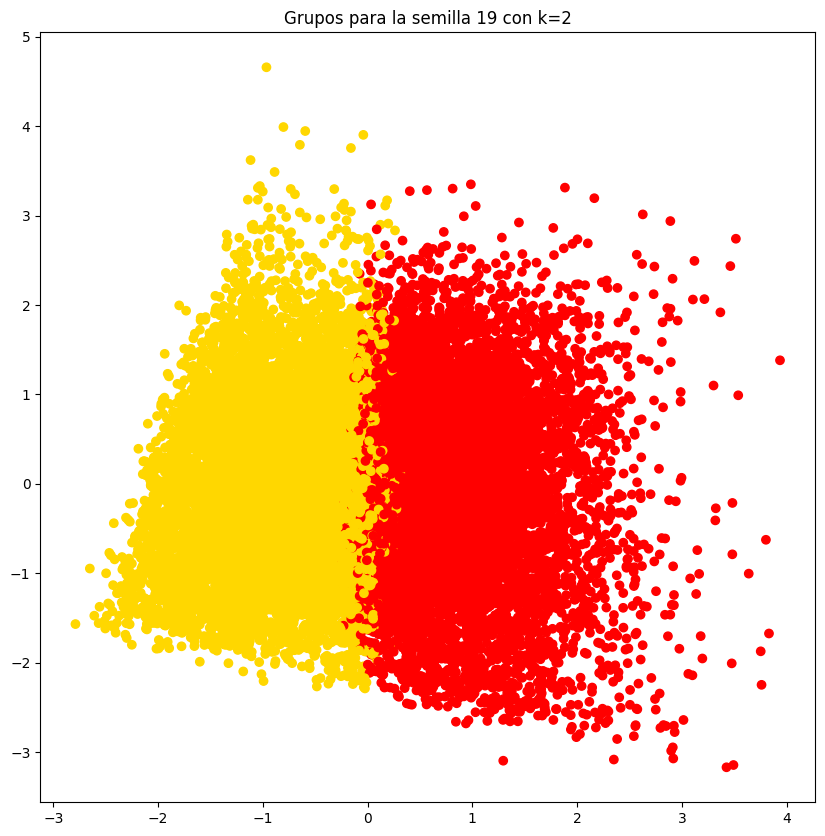

In [28]:
fig = plt.figure(figsize=(10, 10))
plot_model(k, seed)
plt.show()

Con la información anterior, asignamos los grupos:

In [29]:
data_1_['Grupo'] = [f"Grupo {i+1}" for i in final_model.labels_]
data_1_

,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND,Grupo
11,39.0,52.0,34.0,2.0,4.0,4.0,1.0,5.0,5.0,69.0,65.0,73.0,Grupo 2
12,28.0,44.0,16.0,3.0,2.0,5.0,0.0,4.0,4.0,41.0,40.0,76.0,Grupo 2
13,74.0,36.0,41.0,2.0,5.0,2.0,3.0,4.0,2.0,52.0,77.0,66.0,Grupo 2
14,69.0,40.0,18.0,4.0,3.0,5.0,4.0,7.0,6.0,40.0,82.0,78.0,Grupo 2
15,46.0,102.0,44.0,7.0,9.0,3.0,5.0,3.0,3.0,69.0,94.0,50.0,Grupo 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,44.0,42.0,8.0,4.0,7.0,3.0,3.0,3.0,74.0,73.0,93.0,Grupo 1
19996,0.0,85.0,63.0,3.0,5.0,0.0,4.0,7.0,3.0,50.0,83.0,94.0,Grupo 1
19997,32.0,50.0,22.0,0.0,4.0,0.0,6.0,2.0,3.0,61.0,81.0,75.0,Grupo 1
19998,0.0,96.0,69.0,3.0,3.0,3.0,5.0,7.0,4.0,64.0,68.0,68.0,Grupo 1


Verificación general sobre los datos

In [30]:
display(data_1_['Grupo'].value_counts())

Grupo 1    9867
Grupo 2    9461
Name: Grupo, dtype: int64

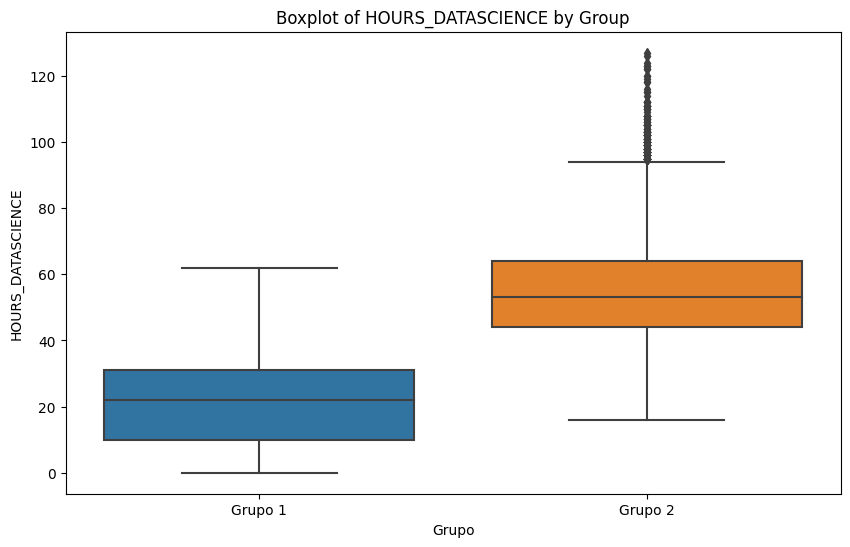

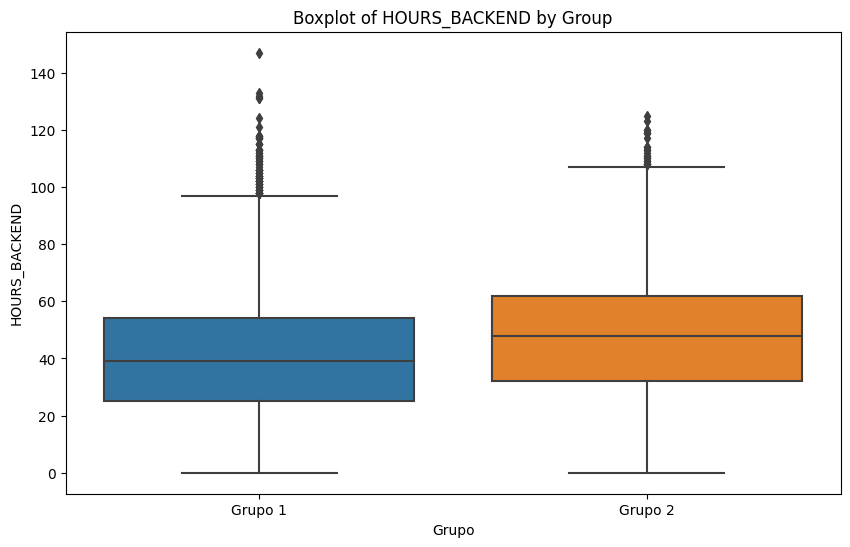

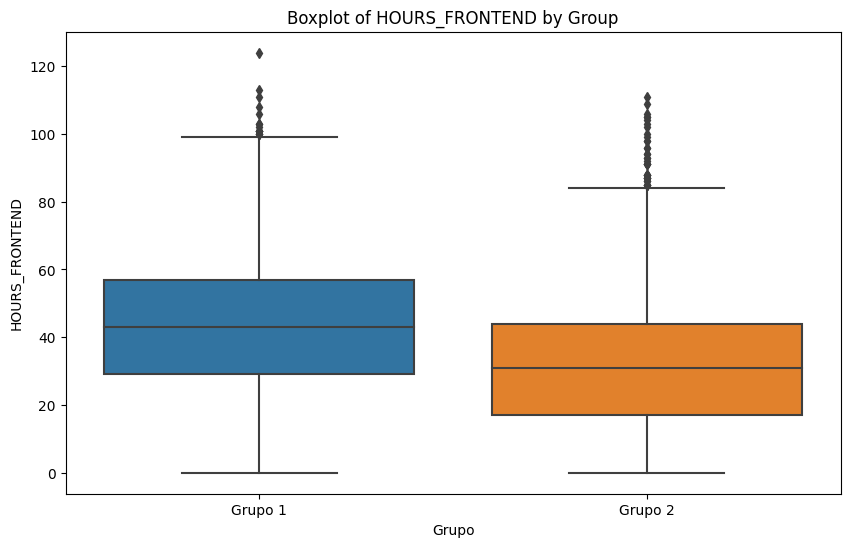

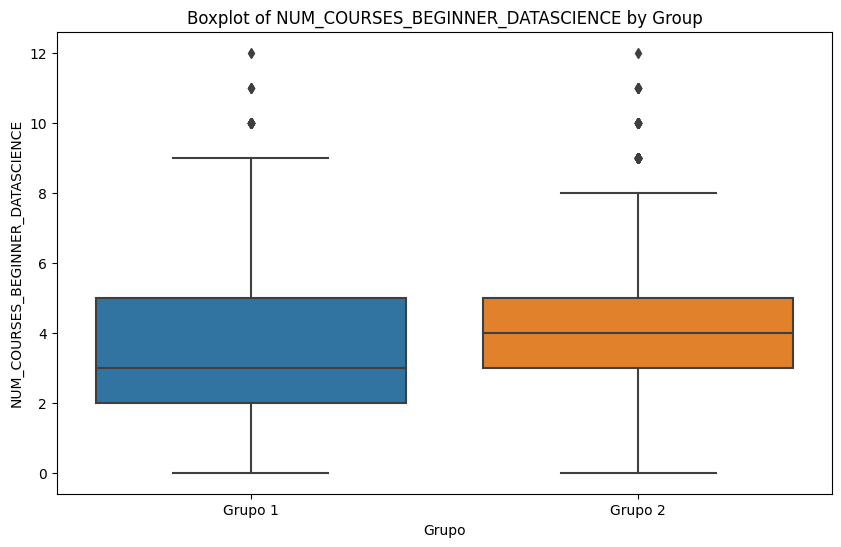

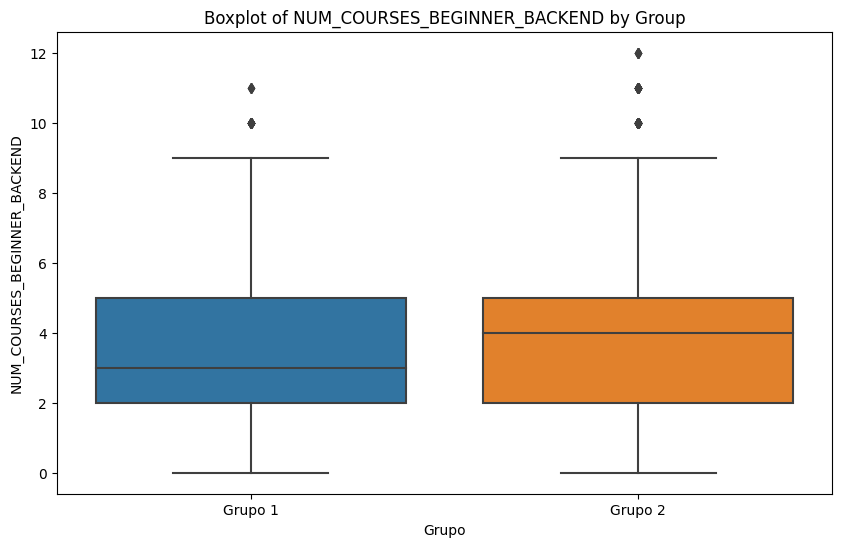

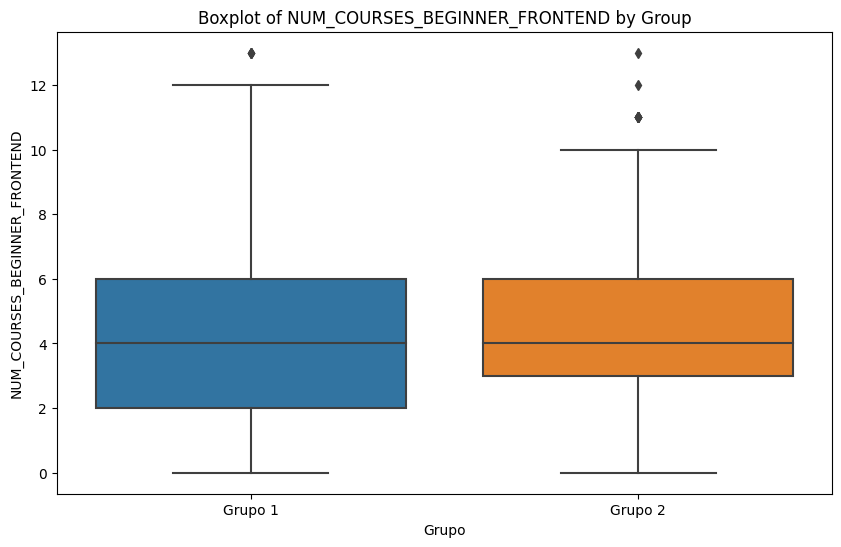

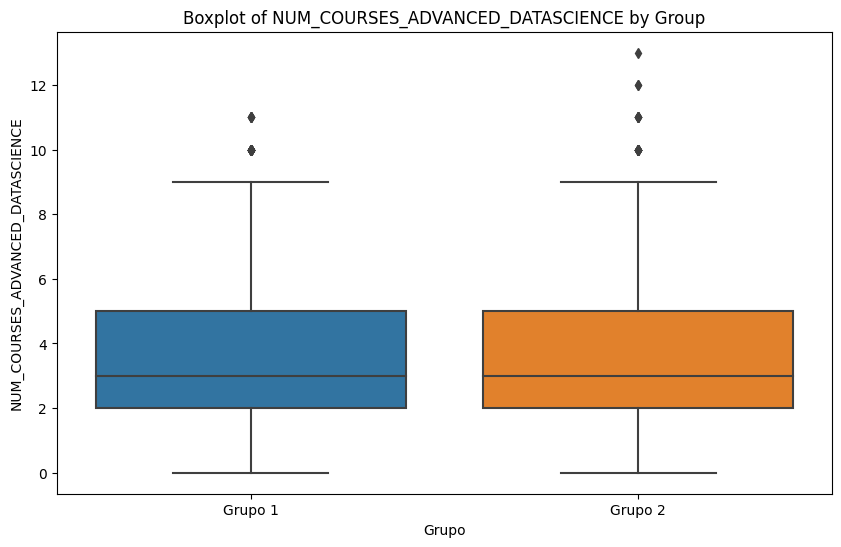

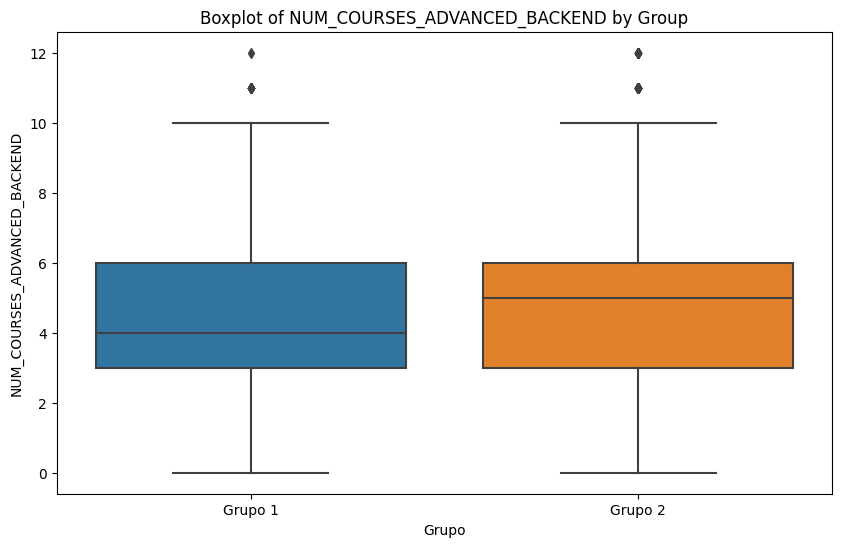

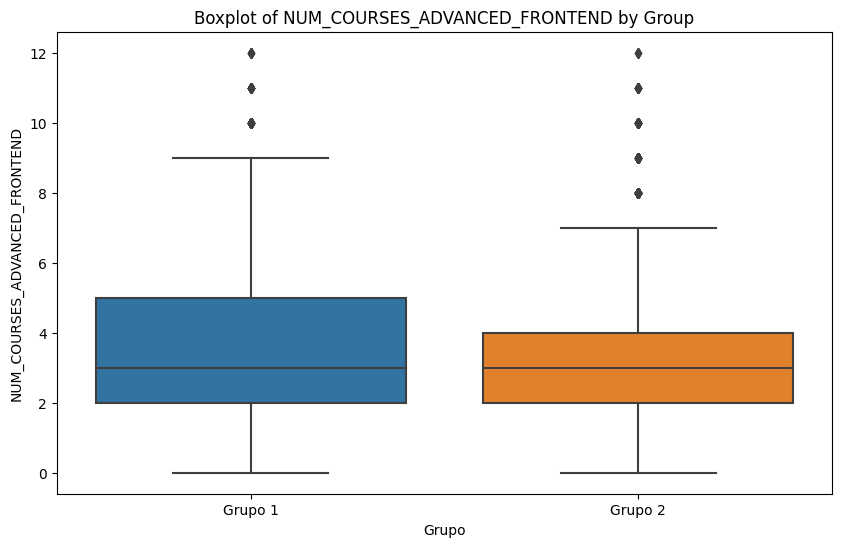

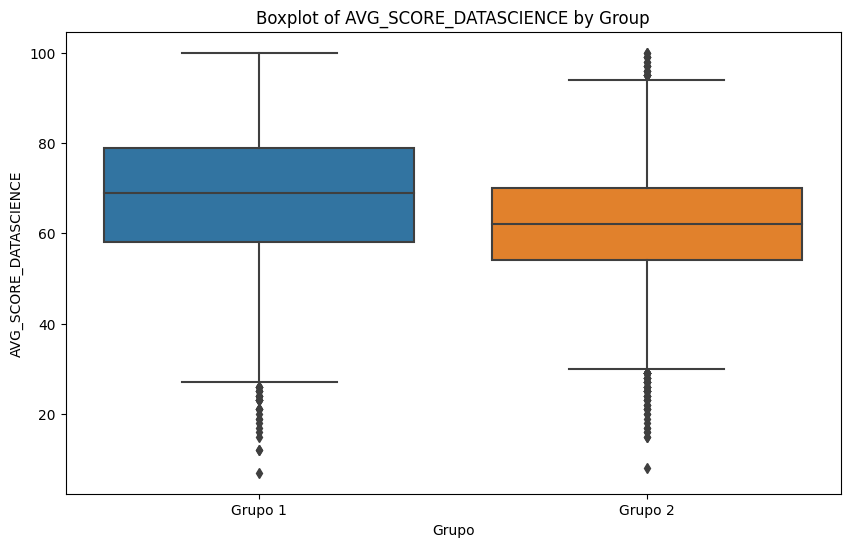

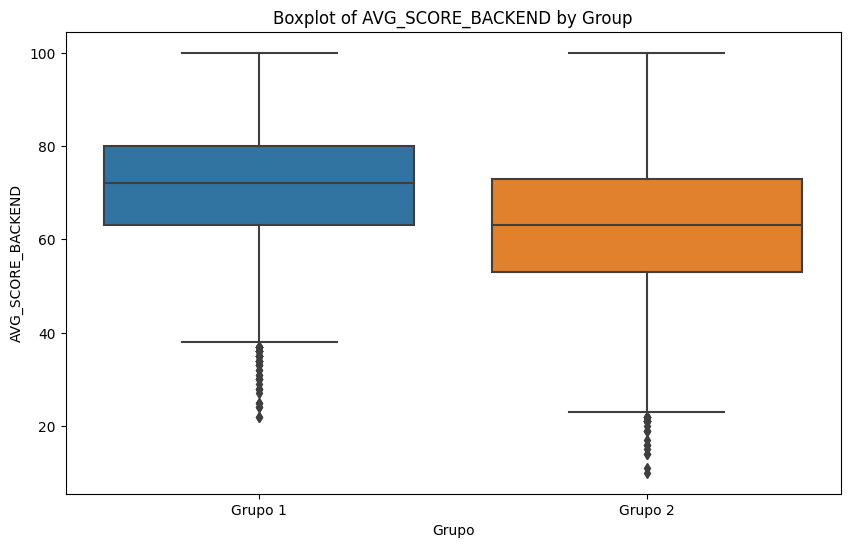

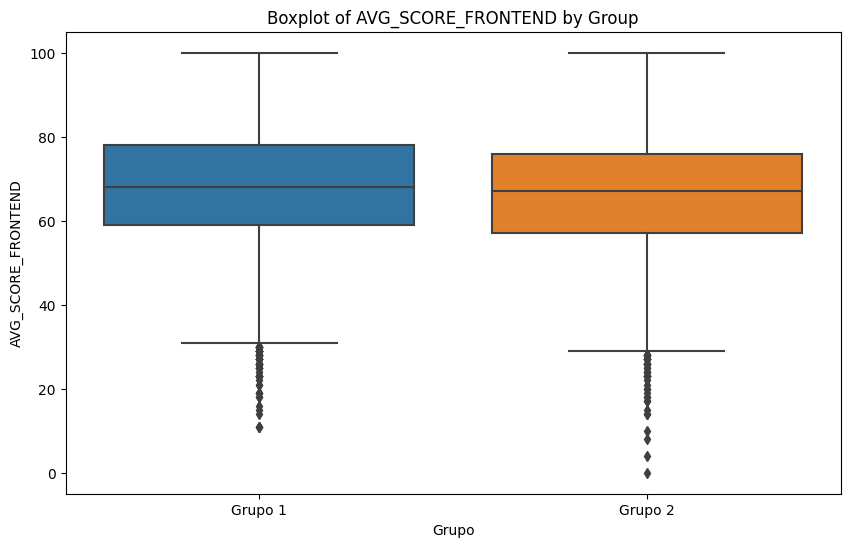

In [31]:
columns = data_1_.columns
columns = columns.drop("Grupo")
df_temp = data_1_.copy()
df_temp['Grupo'] = data_1_['Grupo']

for column in columns:
    df_temp[column] = pd.to_numeric(df_temp[column], errors='coerce')
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Grupo', y=column, data=df_temp, order=['Grupo 1', 'Grupo 2'])
    plt.title(f'Boxplot of {column} by Group')
    plt.show()

In [32]:
info_clusters_ = info_clusters.copy()
info_clusters_["Temática"] = info_clusters_.index.str.split('_')
info_clusters_["Temática"] = info_clusters_["Temática"].apply(lambda x: x[-1])
info_clusters_["Dif"] = info_clusters_["Grupo 1"] - info_clusters_["Grupo 2"]
#info_clusters_["Item"] = info_clusters_.index
info_clusters_.sort_values(["Grupo 1", "Grupo 2"])

,Grupo 1,Grupo 2,Temática,Dif
NUM_COURSES_ADVANCED_DATASCIENCE,3.385549,3.459454,DATASCIENCE,-0.073904
NUM_COURSES_BEGINNER_DATASCIENCE,3.411759,4.060978,DATASCIENCE,-0.649219
NUM_COURSES_BEGINNER_BACKEND,3.551002,3.911497,BACKEND,-0.360495
NUM_COURSES_ADVANCED_FRONTEND,3.568205,3.217447,FRONTEND,0.350758
NUM_COURSES_BEGINNER_FRONTEND,4.072455,4.074000,FRONTEND,-0.001545
NUM_COURSES_ADVANCED_BACKEND,4.119814,4.581939,BACKEND,-0.462126
HOURS_DATASCIENCE,20.894758,55.225704,DATASCIENCE,-34.330946
HOURS_BACKEND,40.133475,47.168219,BACKEND,-7.034744
HOURS_FRONTEND,42.544829,31.191298,FRONTEND,11.353531
AVG_SCORE_FRONTEND,67.655029,66.724222,FRONTEND,0.930807


# Conclusiones

*   Los 2 grupos tienen en común bases en Front-End
*   La cantidad de horas empleadas para ciencia de datos se encuentran en el segundo grupo.
*   El segundo grupo tiene fortalezas o se podría decir que resaltan en ciencia de datos y en Back-End.
*   Las habilidades del Back-End en el segundo grupo no están condicionadas a la experticia, predominan tanto los principiantes, como los avanzados.
*   Por su parte el primer grupo presenta mayor fortaleza en Front-End y en Ciencia de Datos.
*   Las habilidades del Front-End en el segundo grupo no están condicionadas a la experticia, predominan tanto los principiantes, como los avanzados.
*   Los resultados no muestran un grupo en el que predominen perfiles que dominen las 3 temáticas: Ciencia de datos, Back-End y Front-End.
*   Teniendo en cuenta la definición del coeficiente silueta, los valores de los coeficientes en los casos y el mejor modelo, indican que por límites están cerca de superposición.

